### Hypothesis: Sampling the data/ making the data balanced (as we have very less samples for target 1)
Experiment: Perform Upsampling techniques to balance the dataset and compare the precision results.

The dataset is Imbalance and our focus is on the positive target 1(who is more likely to purchase new vehicle). Therefore, we handle the imbalance with:
1. Upsample the minority class
2. Choose another weighted performance metrics: F-beta measure 

In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
car_clean2 = pd.read_csv('../datasets/car_repur_clean2.csv')

car_clean2.head()

,mth_since_last_serv,annualised_mileage,num_serv_dealer_purchased,num_dealers_visited,age_of_vehicle_years,sched_serv_warr,total_services,sched_serv_paid,Target
0,9,8,4,10,9,2,6,3,0
1,6,10,10,7,6,10,10,10,0
2,7,10,10,6,9,10,10,10,0
3,4,10,7,9,5,8,6,8,0
4,5,4,9,4,8,9,8,10,0


### See the histogram distribution of numerical variables before sampling

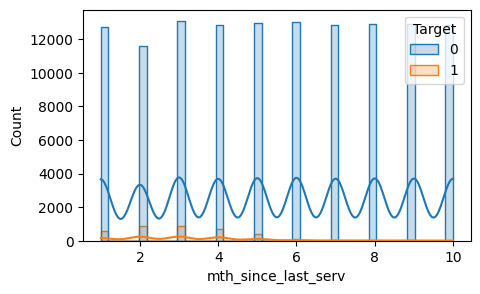

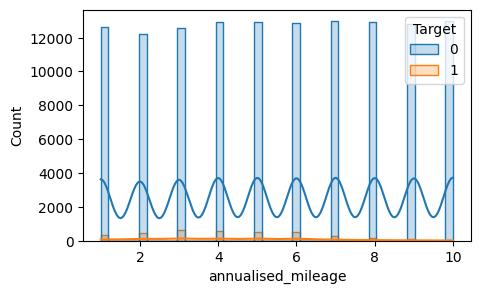

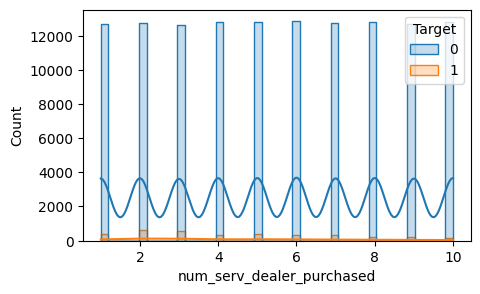

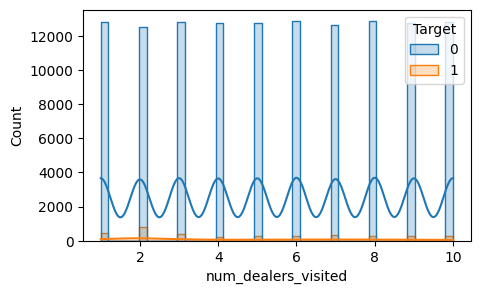

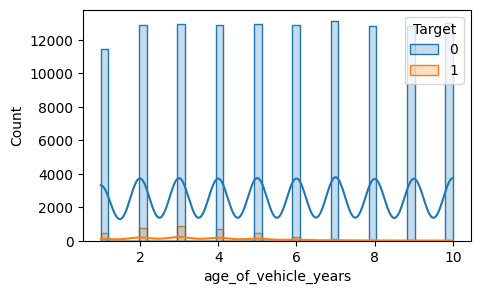

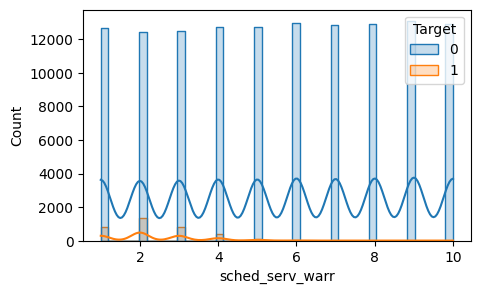

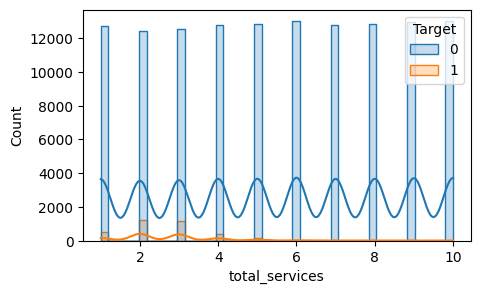

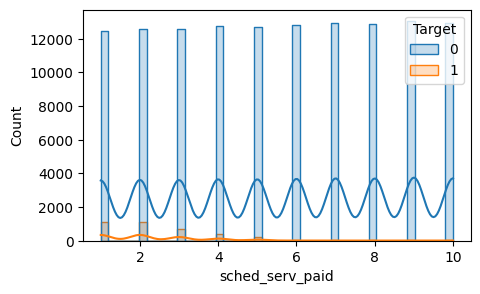

In [2]:
# select the numeric data to plot histogram
num_data = car_clean2.select_dtypes(include=np.number) 
# pop the target variable to plot each variable against it 
target = num_data.pop("Target")
num_cols = num_data.columns.tolist()

# create color map
colors = {0: 'blue', 1: 'red'}

# iterate over numerical columns
for col in num_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=num_data, x=col, hue=target, element='step', kde=True, color=colors)
    plt.show()

The height of each color segment within the bar represents the frequency or count of the data points that fall within that range and have the corresponding target value.

### Upsampling
One of the methoda for oversampling the minority class is called Synthetic Minority Oversampling Technique, or SMOTE. Many times, simply adding duplicate minority class entries to the model doesn't add any new data. SMOTE creates new instances by synthesising the data already available. To put it simply, SMOTE searches for examples of the minority class, uses k nearest neighbours to choose a random nearest neighbour, then generates a synthetic instance at random in feature space.

In [3]:
# Preparing the data for sampling
X = car_clean2.iloc[:,0:8]
y = car_clean2.iloc[:,8]

In [4]:
# Importing SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Resampling the minority class.
sm = SMOTE(sampling_strategy='minority', random_state=23)

# Fit the model to generate the data.
X_oversampled, y_oversampled = sm.fit_resample(X, y)

In [5]:
print(X_oversampled.shape)
print(y_oversampled.shape)

(255632, 8)
(255632,)


In [6]:
X_oversampled.sample(10)

,mth_since_last_serv,annualised_mileage,num_serv_dealer_purchased,num_dealers_visited,age_of_vehicle_years,sched_serv_warr,total_services,sched_serv_paid
206297,1,6,1,1,5,2,1,2
237264,1,4,2,1,2,1,2,3
89104,7,6,8,5,5,9,7,9
223979,3,1,1,1,3,1,2,1
109610,7,7,9,6,4,7,7,7
243507,4,5,10,3,1,3,3,3
126616,3,6,9,10,8,9,8,9
2733,6,4,7,7,5,7,6,6
87646,5,4,5,5,3,4,4,4
253599,3,4,2,2,1,2,2,1


<Axes: xlabel='Target', ylabel='count'>

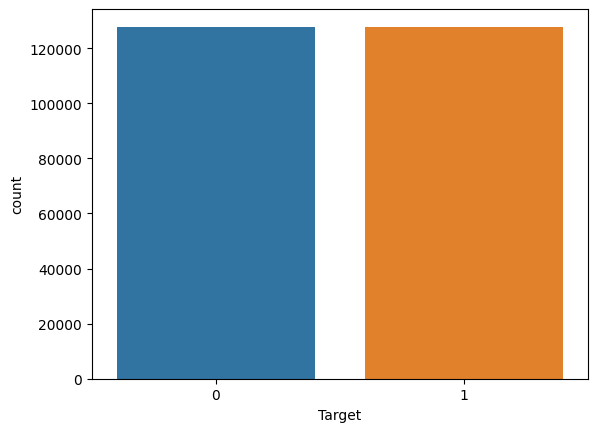

In [7]:
# Distribution of target variable
df = pd.concat([X_oversampled,y_oversampled], axis=1)
sns.countplot(x='Target', data=df)

### We now have the same number of target values - Balanced dataset

In [9]:
# Saving the data to csv
df.to_csv('../datasets/car_repur_clean3.csv', index=False)

See the histogram distribution after sampling

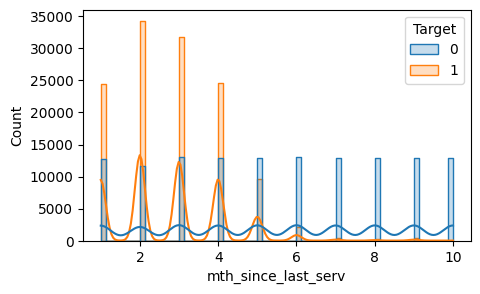

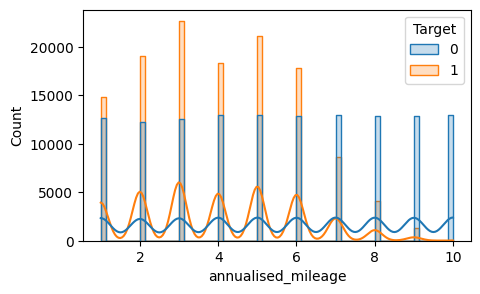

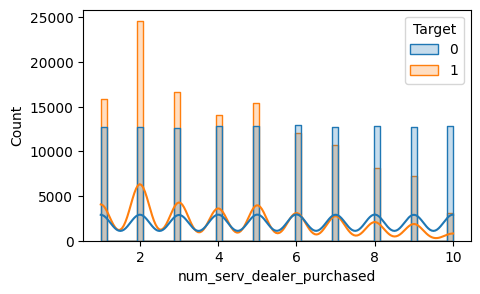

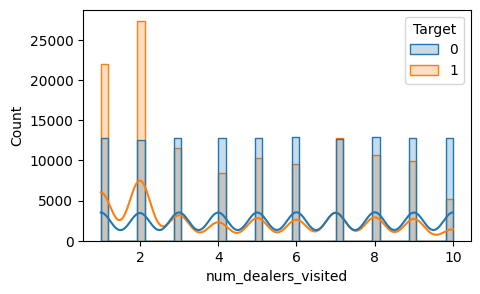

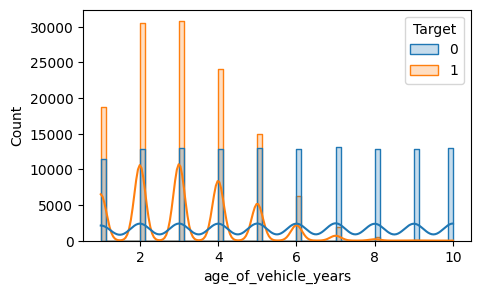

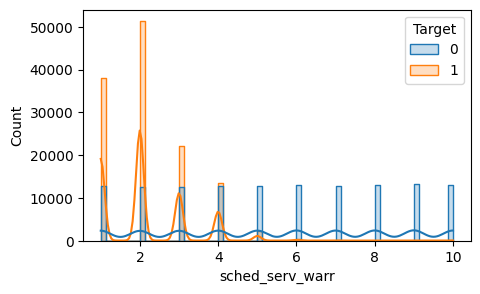

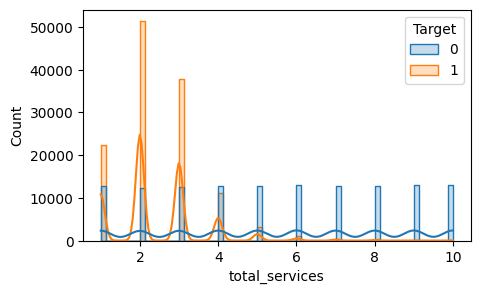

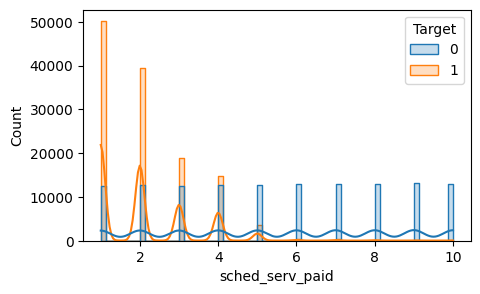

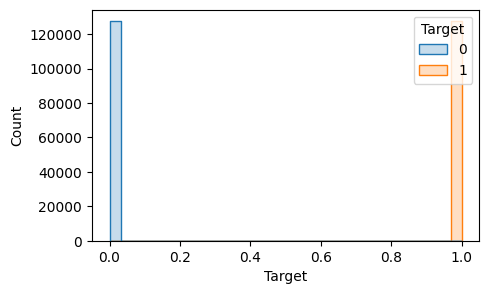

In [10]:
# create color map
colors = {0: 'blue', 1: 'red'}

# iterate over numerical columns
for col in car_clean2.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=df, x=col, hue='Target', element='step', kde=True, color=colors)
    plt.show()

In [11]:
# Import sklearn packages to preprocess data, logistic regression model, Random forest classifier and evaluate it
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

# Import F beta score from scikit learn
from sklearn.metrics import fbeta_score

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                    X_oversampled, y_oversampled, test_size=0.30, 
                                    stratify=y_oversampled, random_state=23, shuffle=True)

# Scale the numeric columns
scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Reregssion

In [13]:
# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81     38345
           1       0.79      0.87      0.83     38345

    accuracy                           0.82     76690
   macro avg       0.82      0.82      0.82     76690
weighted avg       0.82      0.82      0.82     76690



In [14]:
# Calculate f beta score 
fbeta = fbeta_score(y_test, y_pred, average='binary', beta=10, pos_label=1)
print("The Fbeta score is:", fbeta)

The Fbeta score is: 0.8687924958837404


### Note: 

1. The weight of recall in the total score is set by the beta parameter. Beta > 1 lends more weight to recall while beta < 1 gives more importance to precision.
2. Average is set to "binary" meaning it will only calculate for class 1 (pos label set to 1)

### Random Forest

In [15]:
# Train the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=23)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     38345
           1       0.99      1.00      0.99     38345

    accuracy                           0.99     76690
   macro avg       0.99      0.99      0.99     76690
weighted avg       0.99      0.99      0.99     76690



In [16]:
# Evaluate the model using fbeta score
fbeta = fbeta_score(y_test, y_pred, average='binary', beta=10, pos_label=1)
print("The Fbeta score is:", fbeta)

The Fbeta score is: 0.9949591795266884


In [18]:
# importing pickle library
import pickle
# choose the filename you want
filename = '../models/rf_model_upsample_exp3.sav'
# dump the model
pickle.dump(model, open(filename, 'wb'))

### Appendix

In [ ]:
# Define number of bins for histograms
n_bins = 30

# Define color map for target values
colors = {0: 'blue', 1: 'orange'}

# Plot histograms
for col in num_data.columns:
    fig, ax = plt.subplots()
    for target_val, color in colors.items():
        sns.histplot(data=num_data, bins=n_bins,
                     color=color, alpha=0.5, ax=ax, label=f'Target: {target}')
    ax.set_title(f'Histogram of {col}')
    ax.legend()
    plt.show()